In [ ]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))

import os
import cv2
import ast
import torch
import pickle
import datetime
import keyboard
import numpy as np
import pandas as pd
from utils.eval_utils import *
from utils.experiments_utils import *
import matplotlib.pyplot as plt
from utils.train_utils import *
from utils.sim_utils import *
from utils.couzin_utils import *
import matplotlib.image as mpimg
import matplotlib.colors as colors
from models.Generator import ModularPolicy
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from marl_aquarium.aquarium_v0 import parallel_env

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

c:\Users\janni\anaconda3\envs\GAIL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : No C++ compiler found. Define CXX environment variable or install g++.
[KeOps] Warning : No C++ compiler found. You need to either define the CXX environment variable pointing to a valid compiler, or ensure that 'g++' is installed and in your PATH.
[KeOps] Warning : CUDA libraries not found or could not be loaded; Switching to CPU only.
[KeOps] Warning : No C++ compiler found. You need to either define the CXX environment variable pointing to a valid compiler, or ensure that 'g++' is installed and in your PATH.
[KeOps] Warning : No C++ compiler available to check for OpenMP support.
[KeOps] Warning : OpenMP support is not available. Disabling OpenMP.


## Model Comparison using Swarm Metrics

In [3]:
# GAIL Simulation
gail_path = rf"..\data\2. Training\training\SequencePredPrey - GAIL\2026.01.10_10.36"
gail_prey_policy = ModularPolicy(features=5).to("cpu")
gail_prey_policy.load_state_dict(torch.load((os.path.join(gail_path, "prey_policy.pth")), map_location="cpu"))

gail_pred_policy = ModularPolicy(features=4).to("cpu")
gail_pred_policy.load_state_dict(torch.load((os.path.join(gail_path, "pred_policy.pth")), map_location="cpu"))

_, _, gail_metrics = run_env_simulation(visualization='off', 
                                        prey_policy=gail_prey_policy, 
                                        pred_policy=gail_pred_policy,
                                        n_prey=32, n_pred=1, 
                                        max_steps=100,
                                        pred_speed=5, prey_speed=5,
                                        area_width=50, area_height=50,
                                        max_turn = 0.25,
                                        step_size=0.5)

RuntimeError: Error(s) in loading state_dict for ModularPolicy:
	Missing key(s) in state_dict: "pairwise.fc4.weight", "pairwise.fc4.bias", "attention.fc4.weight", "attention.fc4.bias". 
	size mismatch for pairwise.fc1.weight: copying a param with shape torch.Size([100, 5]) from checkpoint, the shape in current model is torch.Size([128, 5]).
	size mismatch for pairwise.fc1.bias: copying a param with shape torch.Size([100]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for pairwise.fc2.weight: copying a param with shape torch.Size([30, 100]) from checkpoint, the shape in current model is torch.Size([64, 128]).
	size mismatch for pairwise.fc2.bias: copying a param with shape torch.Size([30]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for pairwise.fc3.weight: copying a param with shape torch.Size([2, 30]) from checkpoint, the shape in current model is torch.Size([32, 64]).
	size mismatch for pairwise.fc3.bias: copying a param with shape torch.Size([2]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for attention.fc1.weight: copying a param with shape torch.Size([100, 5]) from checkpoint, the shape in current model is torch.Size([128, 5]).
	size mismatch for attention.fc1.bias: copying a param with shape torch.Size([100]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for attention.fc2.weight: copying a param with shape torch.Size([30, 100]) from checkpoint, the shape in current model is torch.Size([64, 128]).
	size mismatch for attention.fc2.bias: copying a param with shape torch.Size([30]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for attention.fc3.weight: copying a param with shape torch.Size([1, 30]) from checkpoint, the shape in current model is torch.Size([32, 64]).
	size mismatch for attention.fc3.bias: copying a param with shape torch.Size([1]) from checkpoint, the shape in current model is torch.Size([32]).

In [ ]:
# GAIL Simulation
bc_path = rf"..\models\trained_policies\BC-Policy"
bc_prey_policy = ModularPolicy(features=5).to("cpu")
bc_prey_policy.load_state_dict(torch.load((os.path.join(bc_path, "bc_prey_policy.pt")), map_location="cpu"))

bc_pred_policy = ModularPolicy(features=4).to("cpu")
bc_pred_policy.load_state_dict(torch.load((os.path.join(bc_path, "bc_pred_policy.pt")), map_location="cpu"))

_, _, bc_metrics = run_env_simulation(visualization='off', 
                                    prey_policy=bc_prey_policy, 
                                    pred_policy=bc_pred_policy,
                                    n_prey=32, n_pred=1, 
                                    max_steps=100,
                                    pred_speed=5, prey_speed=5,
                                    area_width=50, area_height=50,
                                    max_turn = 0.25,
                                    step_size=0.5)

In [ ]:
# Couzin Simulation
_, _, couzin_metrics, _, _ = run_couzin_simulation(visualization="off", max_steps=100, 
                                                constant_speed=5, shark_speed=5, 
                                                area_width=50, area_height=50,
                                                dt = 0.5, # step_size
                                                alpha=0.01, # social behavior - attack only
                                                theta_dot_max=0.5, theta_dot_max_shark=0.5,
                                                number_of_sharks=1, n=32)

In [ ]:
random_prey_policy = ModularPolicy(features=5).to("cpu")
random_prey_policy.set_parameters()

random_pred_policy = ModularPolicy(features=4).to("cpu")
random_pred_policy.set_parameters()

_, _, random_metrics = run_env_simulation(visualization='off', 
                                        prey_policy=random_prey_policy, 
                                        pred_policy=random_pred_policy,
                                        n_prey=32, n_pred=1, 
                                        max_steps=100,
                                        pred_speed=5, prey_speed=5,
                                        area_width=50, area_height=50,
                                        max_turn = 0.25,
                                        step_size=0.5)

In [ ]:
# Load Expert Data
expert_path = rf'..\data\1. Data Processing\processed\video\expert_tensors\yolo_detected\expert_metrics_yd.pkl'
with open(expert_path, "rb") as f:
    expert_data = pickle.load(f)
expert_metrics = compute_expert_metrics(expert_data, 33)
print("Expert Metrics computed!")

Expert Metrics computed!


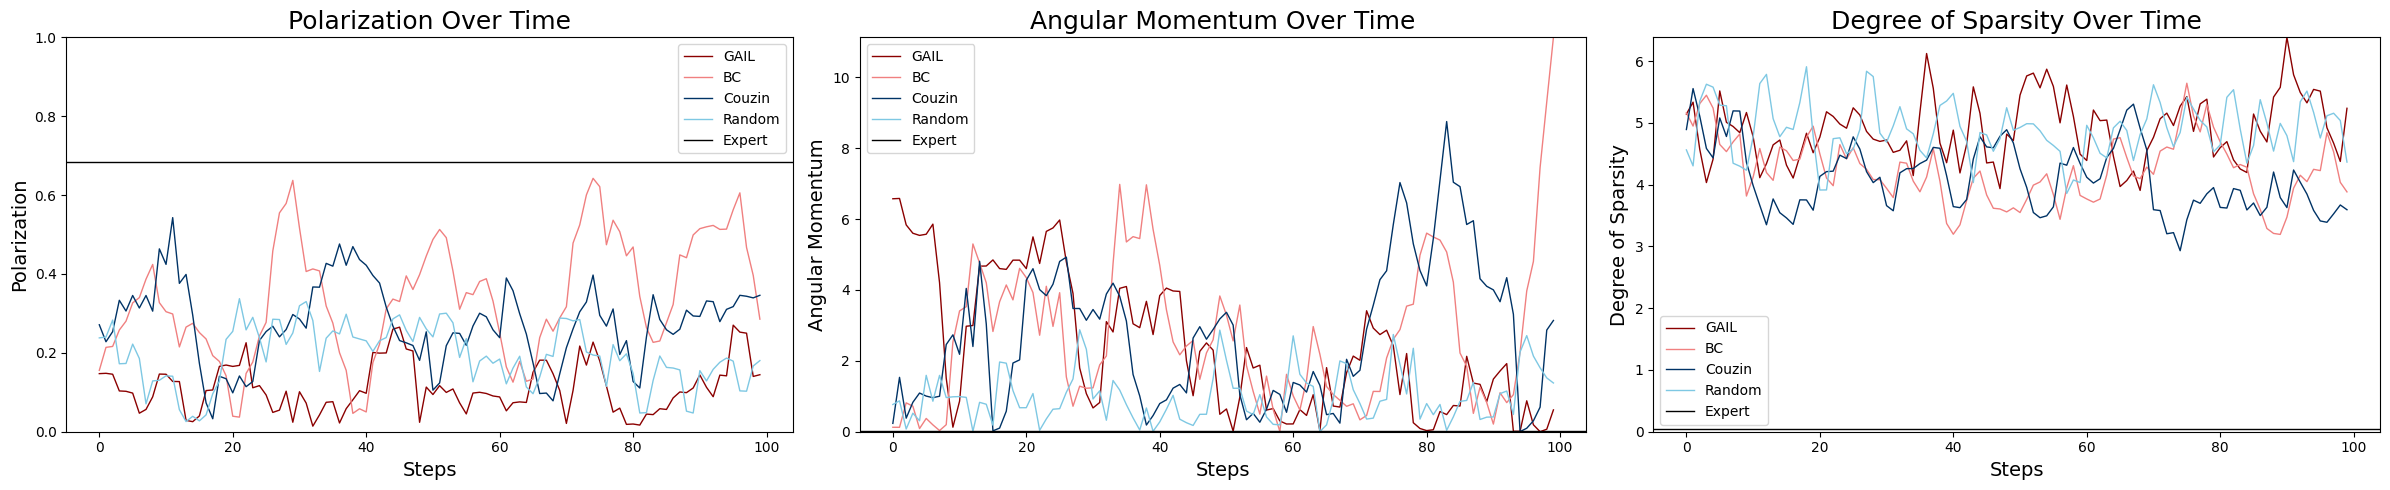

In [ ]:
plot_swarm_metrics(gail_metrics, bc_metrics, couzin_metrics, random_metrics, expert_metrics)

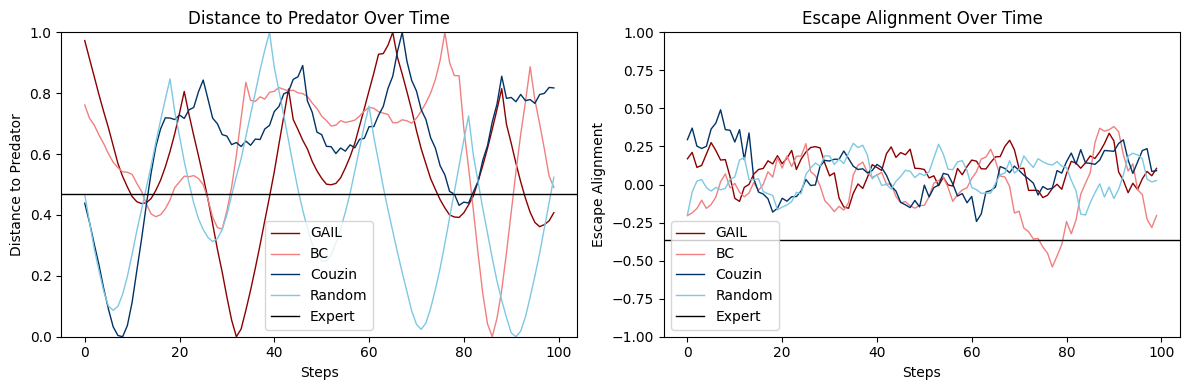

In [ ]:
plot_pred_prey_metrics(gail_metrics, bc_metrics, couzin_metrics, random_metrics, expert_metrics)

## Analysis of Modular Networks

In [ ]:
# GAIL Simulation
gail_path = rf"..\data\2. Training\training\SequencePredPrey - GAIL\2026.01.10_10.36"
gail_prey_policy = ModularPolicy(features=5).to("cpu")
gail_prey_policy.load_state_dict(torch.load((os.path.join(gail_path, "prey_policy.pth")), map_location="cpu"))

gail_pred_policy = ModularPolicy(features=4).to("cpu")
gail_pred_policy.load_state_dict(torch.load((os.path.join(gail_path, "pred_policy.pth")), map_location="cpu"))

pred_img_path = rf"..\data\3. Evaluation\images\predator.png"
prey_img_path = rf"..\data\3. Evaluation\images\prey.png"

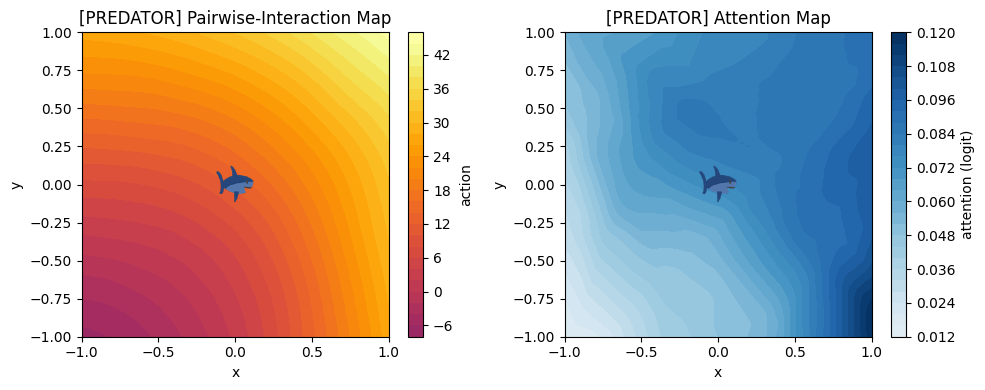

In [ ]:
xs, ys, pred_action_map, pred_attn_map = compute_pin_an_maps(role="predator", pin=gail_pred_policy.pairwise, an=gail_pred_policy.attention)

plot_policy_maps(xs, ys, pred_action_map, pred_attn_map, role="predator", img_path=pred_img_path)

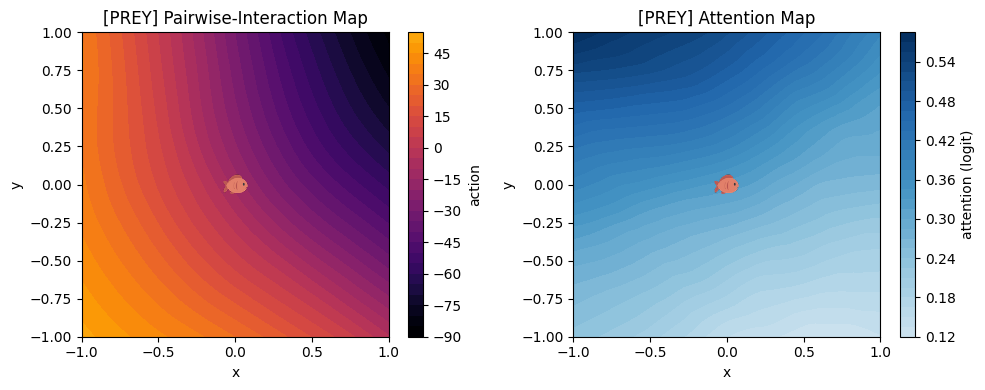

In [ ]:
xs, ys, prey_action_map, prey_attn_map = compute_pin_an_maps(role="prey", pin=gail_prey_policy.pairwise, an=gail_prey_policy.attention)

plot_policy_maps(xs, ys, prey_action_map, prey_attn_map, role="prey", img_path=prey_img_path)

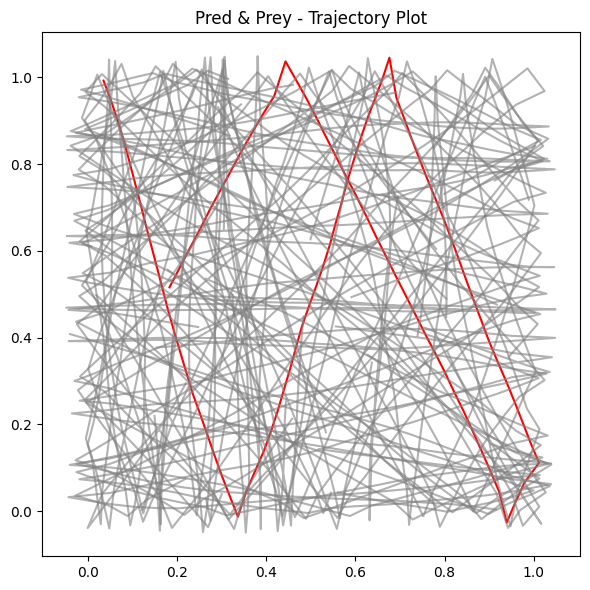

In [ ]:
plot_trajectory(gail_metrics)

## Trajectory Prediction

In [24]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))

import os
import cv2
import ast
import torch
import pickle
import datetime
import keyboard
import numpy as np
import pandas as pd
from utils.eval_utils import *
from utils.experiments_utils import *
import matplotlib.pyplot as plt
from utils.train_utils import *
from utils.sim_utils import *
from utils.couzin_utils import *
import matplotlib.image as mpimg
import matplotlib.colors as colors
from models.Generator import ModularPolicy
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from marl_aquarium.aquarium_v0 import parallel_env

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
init_pool_path = rf"..\data\1. Data Processing\processed\init_pool\init_pool.pt"
init_pool = torch.load(init_pool_path).to(device)
print("Init Pool Shape:", init_pool.shape)

prey_policy = ModularPolicy(features=5).to("cpu")
prey_policy.set_parameters()

pred_policy = ModularPolicy(features=4).to("cpu")
pred_policy.set_parameters()

Init Pool Shape: torch.Size([240, 33, 3])


Step 0 | Position Error: 0.0000 ± 0.0000 | Theta Error: 0.00° ± 0.00°
Step 1 | Position Error: 0.0492 ± 0.0003 | Theta Error: 3.19° ± 2.04°
Step 2 | Position Error: 0.0982 ± 0.0006 | Theta Error: 5.93° ± 3.28°
Step 3 | Position Error: 0.1456 ± 0.0020 | Theta Error: 9.95° ± 4.06°
Step 4 | Position Error: 0.1923 ± 0.0036 | Theta Error: 13.83° ± 5.20°
Step 5 | Position Error: 0.2360 ± 0.0069 | Theta Error: 20.34° ± 7.47°
Step 6 | Position Error: 0.2738 ± 0.0145 | Theta Error: 31.70° ± 13.41°
Step 7 | Position Error: 0.3065 ± 0.0247 | Theta Error: 41.95° ± 18.72°
Step 8 | Position Error: 0.3356 ± 0.0348 | Theta Error: 51.64° ± 22.24°
Step 9 | Position Error: 0.3566 ± 0.0409 | Theta Error: 67.22° ± 21.56°


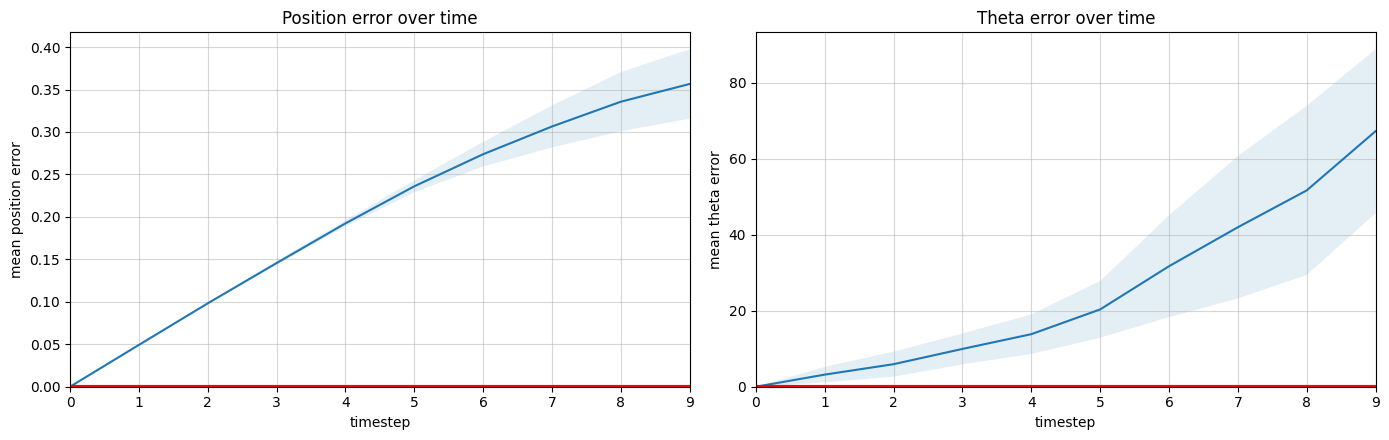

In [3]:
clips = init_pool.view(24, 10, 33, 3)

clip_position_error = []
clip_theta_error = []

for clip in range(clips.shape[0]):
    clip = clips[clip]
    init_pos = clip[0].clone()


    metric_list = []
    for i in range(50):
        _, _, metrics = run_env_simulation(visualization='off', 
                                            init_pool=init_pos, experiment=True,
                                            prey_policy=prey_policy, 
                                            pred_policy=pred_policy,
                                            n_prey=32, n_pred=1, 
                                            max_steps=10,
                                            pred_speed=5, prey_speed=5,
                                            area_width=50, area_height=50,
                                            max_turn = 0.25,
                                            step_size=0.5)
        metric_list.append(metrics[0])
        
    gen_xs = np.array([[step["xs"] for step in rollout_metrics] for rollout_metrics in metric_list], dtype=np.float32)
    gen_ys = np.array([[step["ys"] for step in rollout_metrics] for rollout_metrics in metric_list], dtype=np.float32)
    gen_thetas = np.array([[step["theta"] for step in rollout_metrics] for rollout_metrics in metric_list], dtype=np.float32)

    exp_xs = clip[:, :, 0].detach().cpu().numpy().astype(np.float32)
    exp_ys = clip[:, :, 1].detach().cpu().numpy().astype(np.float32)
    exp_thetas = clip[:, :, 2] .detach().cpu().numpy().astype(np.float32)

    #gen (10,10,33), exp (10,33)
    dx = gen_xs - exp_xs[None, :, :]
    dy = gen_ys - exp_ys[None, :, :]

    # euclidean distance
    position_error = np.sqrt(dx**2 + dy**2) #(10, 10, 33)

    # offset in degrees
    gen_theta_deg = (np.rad2deg(gen_thetas) + 180) % 360 - 180
    exp_theta_deg = (np.rad2deg(exp_thetas) + 180) % 360 - 180
    theta_diff = (gen_theta_deg - exp_theta_deg[None, :, :] + 180) % 360 - 180
    theta_error = np.abs(theta_diff) #(10, 10, 33)

    # mean error over agent dimension
    position_error_agents = position_error.mean(axis=2) #(10, 10)
    theta_error_agents = theta_error.mean(axis=2) #(10, 10)

    # position error per time step
    step_position_error = position_error_agents.mean(axis=0)
    step_position_std  = position_error_agents.std(axis=0)
    clip_position_error.append(step_position_error)

    # theta error per time step
    step_theta_error = theta_error_agents.mean(axis=0)
    step_theta_std  = theta_error_agents.std(axis=0)
    clip_theta_error.append(step_theta_error)
        
# stack errors
clip_position_error = np.stack(clip_position_error, axis=0)  # (24, T)
clip_theta_error = np.stack(clip_theta_error, axis=0)     # (24, T)

clip_position_error_mean = clip_position_error.mean(axis=0)
clip_position_error_std  = clip_position_error.std(axis=0)
clip_theta_error_mean = clip_theta_error.mean(axis=0)
clip_theta_error_std  = clip_theta_error.std(axis=0)

for step in range(position_error_agents.shape[1]):
    print(f"Step {step} | Position Error: {clip_position_error_mean[step]:.4f} ± {clip_position_error_std[step]:.4f} | "
          f"Theta Error: {clip_theta_error_mean[step]:.2f}° ± {clip_theta_error_std[step]:.2f}°")

t = np.arange(step_position_error.shape[0])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4.5), sharex=True)

# Position error
ax1.plot(t, clip_position_error_mean)
ax1.fill_between(t, clip_position_error_mean - clip_position_error_std, clip_position_error_mean + clip_position_error_std, alpha=0.12)
ax1.axhline(0, color="red", linewidth=3)
ax1.grid(True, linewidth=0.8, alpha=0.5)
ax1.set_xlim(0, t[-1])
ax1.set_ylim(0)
ax1.set_xlabel("timestep")
ax1.set_ylabel("mean position error")
ax1.set_title("Position error over time")

# Theta error
ax2.plot(t, clip_theta_error_mean)
ax2.fill_between(t, clip_theta_error_mean - clip_theta_error_std, clip_theta_error_mean + clip_theta_error_std, alpha=0.12)
ax2.axhline(0, color="red", linewidth=3)
ax2.grid(True, linewidth=0.8, alpha=0.5)
ax2.set_xlim(0, t[-1])
ax2.set_ylim(0)
ax2.set_xlabel("timestep")
ax2.set_ylabel("mean theta error")
ax2.set_title("Theta error over time")

plt.tight_layout()
plt.show()

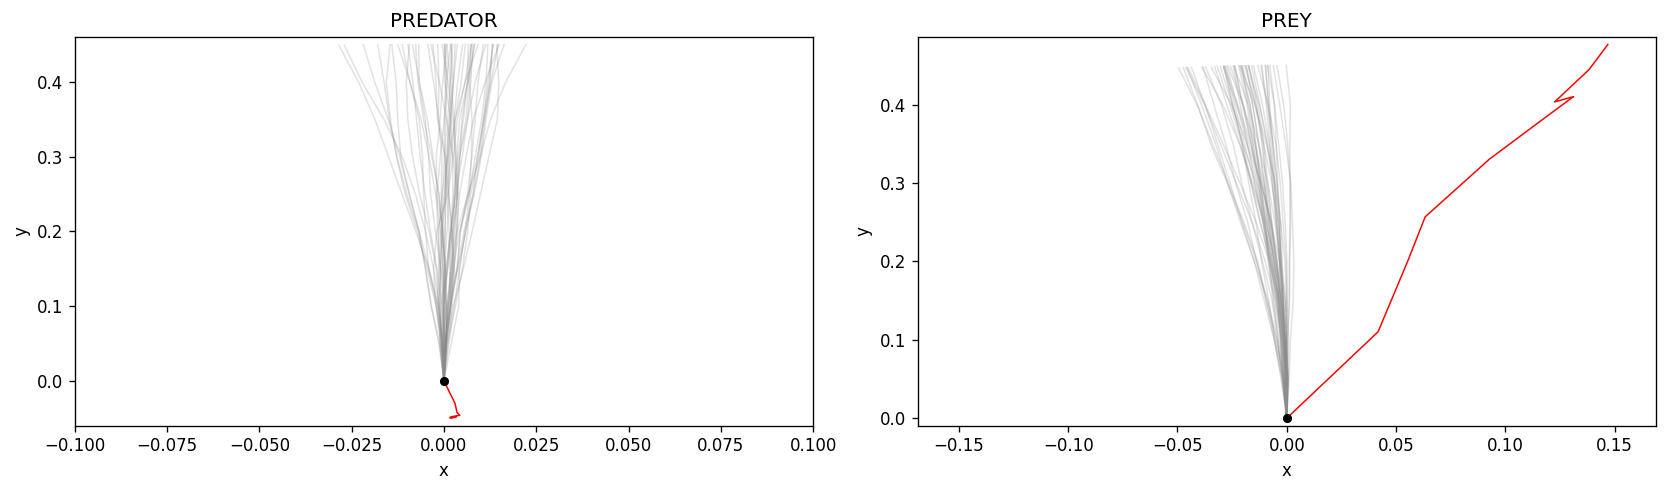

In [4]:
def align_to_start_heading(x, y, theta):
    # convert to relative coordinates with start at (0,0)
    start_x = x[0]
    start_y = y[0]
    x_norm = x - start_x
    y_norm = y - start_y

    # rotate so the heading points "up" (positive y-axis)
    rotation_angle = (np.pi / 2.0) - theta
    cos_angle = np.cos(rotation_angle)
    sin_angle = np.sin(rotation_angle)

    x_rotated = cos_angle * x_norm - sin_angle * y_norm
    y_rotated = sin_angle * x_norm + cos_angle * y_norm

    return x_rotated, y_rotated


def trajectory_plot(ax, agent_idx, role):
    n_rollouts, agents, coordinates = gen_xs.shape

    rollouts = np.arange(n_rollouts)

    all_x = []
    all_y = []

    # Draw generated trajectories in grey
    for r in rollouts:
        x = np.asarray(gen_xs[r, :, agent_idx], dtype=np.float32)
        y = np.asarray(gen_ys[r, :, agent_idx], dtype=np.float32)
        theta = float(gen_thetas[r, 0, agent_idx])
        x_rotated, y_rotated = align_to_start_heading(x, y, theta)
        all_x.append(x_rotated)
        all_y.append(y_rotated)

        ax.plot(x_rotated, y_rotated, color="0.55", linewidth=0.9, alpha=0.25, zorder=1)

    # Draw expert in red
    scale = 50
    exp_x = np.asarray(exp_xs[:, agent_idx], dtype=np.float32) * scale
    exp_y = np.asarray(exp_ys[:, agent_idx], dtype=np.float32) * scale
    exp_theta = float(exp_thetas[0, agent_idx])
    align_exp_x, align_exp_y = align_to_start_heading(exp_x, exp_y, exp_theta)
    all_x.append(align_exp_x) 
    all_y.append(align_exp_y)

    ax.plot(align_exp_x, align_exp_y, color="red", linewidth=0.9, alpha=1.0, zorder=10)

    # Set startpoint
    ax.scatter([0.0], [0.0], s=20, color="black", zorder=12)
    ax.set_title(role.upper())
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_aspect("auto")

    # widen x-limits even if tight
    x_all = np.concatenate(all_x)
    y_all = np.concatenate(all_y)

    x_abs = float(np.max(np.abs(x_all))) if x_all.size else 0.0
    y_min = float(np.min(y_all)) if y_all.size else 0.0
    y_max = float(np.max(y_all)) if y_all.size else 1.0

    x_span = max(0.10, 1.15 * x_abs)
    ax.set_xlim(-x_span, x_span)

    y_pad = 0.02 * (y_max - y_min + 1e-9)
    ax.set_ylim(y_min - y_pad, y_max + y_pad)

fig, axes = plt.subplots(1, 2, figsize=(14, 4.2), dpi=120)  # wider figure

trajectory_plot(axes[0], agent_idx=0, role="Predator")
trajectory_plot(axes[1], agent_idx=1, role="Prey")

plt.tight_layout()
plt.show()

## Social Role Analysis

In [5]:
# GAIL Simulation
#bc_path = rf"..\models\trained_policies\BC-Policy"
#bc_prey_policy = ModularPolicy(features=5).to("cpu")
#bc_prey_policy.load_state_dict(torch.load((os.path.join(bc_path, "bc_prey_policy.pt")), map_location="cpu"))

#bc_pred_policy = ModularPolicy(features=4).to("cpu")
#bc_pred_policy.load_state_dict(torch.load((os.path.join(bc_path, "bc_pred_policy.pt")), map_location="cpu"))

random_prey_policy = ModularPolicy(features=5).to("cpu")
random_prey_policy.set_parameters()

random_pred_policy = ModularPolicy(features=4).to("cpu")
random_pred_policy.set_parameters()

_, _, gail_metrics = run_env_simulation(visualization='off', 
                                        prey_policy=random_prey_policy, 
                                        pred_policy=random_pred_policy,
                                        n_prey=32, n_pred=1, 
                                        max_steps=100,
                                        pred_speed=5, prey_speed=5,
                                        area_width=50, area_height=50,
                                        max_turn = 0.25,
                                        step_size=0.5)


pred_img_path = rf"..\data\3. Evaluation\images\predator.png"
prey_img_path = rf"..\data\3. Evaluation\images\prey.png"

In [55]:
def compute_incoming_weights(frame_metrics):
    weights_pred, weights_prey = frame_metrics["weights"]
    idx_info = frame_metrics["weights_idx"]

    pred_self = idx_info["pred"]["self"]
    pred_neighbors = np.array(idx_info["pred"]["neighbors"])
    prey_self = np.array(idx_info["prey"]["self"])
    prey_neighbors = np.array(idx_info["prey"]["neighbors"])

    incoming = np.zeros(33, dtype=float)

    for j, tgt in enumerate(pred_neighbors):
        incoming[tgt] += float(weights_pred[0, j])

    for r, focal in enumerate(prey_self):
        for c, tgt in enumerate(prey_neighbors[r]):
            incoming[tgt] += float(weights_prey[r, c])

    prey_incoming = incoming[1:]
    incoming_min = prey_incoming.min()
    incoming_max = prey_incoming.max()
    incoming_scaled = 0.2 + (prey_incoming - incoming_min) / (incoming_max - incoming_min) * (1.0 - 0.2) # Scale to alpha range for transparency
    incoming = np.insert(incoming_scaled, 0, incoming[0])

    incoming_dict = {f"predator_{pred_self}": 0.999} #{f"predator_{pred_self}": incoming[pred_self]}
    for i in prey_self:
        incoming_dict[f"prey_{i}"] = incoming[i]

    return incoming_dict


def draw_attention_graph(metrics_weights, frame_idx=1, pred_img_path=None, prey_img_path=None):

    metrics_list, weights_list = metrics_weights
    
    metrics = metrics_list[frame_idx]
    weights = weights_list[frame_idx]    

    xs = np.array(metrics["xs"])
    ys = np.array(metrics["ys"])
    directions = np.array(metrics["theta"])

    # center the graph
    x_center = xs.mean()
    y_center = ys.mean()
    xs_centered = xs - x_center
    ys_centered = ys - y_center

    max_range = max(max(xs_centered), max(ys_centered), abs(min(xs_centered)), abs(min(ys_centered))) + 0.05 # automated scaling + margin

    n_agents = len(xs_centered)

    fig, ax = plt.subplots(figsize=(7, 7))

    # Draw edges
    for i in range(n_agents):
        for j in range(i+1, n_agents):
            ax.plot([xs_centered[i], xs_centered[j]],
                    [ys_centered[i], ys_centered[j]],
                    color="gray", linewidth=1, alpha=0.2)

    # Nodes as Images
    pred_image = Image.open(pred_img_path).convert("RGBA")
    prey_image = Image.open(prey_img_path).convert("RGBA")

    alphas = compute_incoming_weights(weights)  # to get incoming weights for transparency

    for i in range(n_agents):
        angle_deg = np.degrees(directions[i])

        base_img = pred_image if i == 0 else prey_image

        alpha = alphas[f"predator_0"] if i == 0 else alphas[f"prey_{i}"]

        rotated_img = base_img.rotate(angle_deg+180, resample=Image.BICUBIC, expand=True)
        rotated_img = np.asarray(rotated_img).copy()

        # Mark leader prey red
        if alpha == 1.0:
            rotated_img = rotated_img.astype(float)
            rotated_img[..., 0] *= 1.8
            rotated_img[..., 1] *= 0.6
            rotated_img[..., 2] *= 0.6
            rotated_img = np.clip(rotated_img, 0, 255).astype(np.uint8)

        rotated_img[:, :, 3] = (rotated_img[:, :, 3].astype(float) * alpha).astype(np.uint8)

        imgbox = OffsetImage(rotated_img, zoom=0.45)
        imgbox.rotation = angle_deg
        ann_box = AnnotationBbox(imgbox, (xs_centered[i], ys_centered[i]), frameon=False, xycoords='data', zorder=2)
        ax.add_artist(ann_box)

    ax.set_title(f"Attention Graph (Frame {frame_idx})")
    ax.set_facecolor("#ACCEE7") # blue from marl_aquarium
    ax.set_xlim(-max_range, max_range)
    ax.set_ylim(-max_range, max_range)

    plt.tight_layout()
    plt.show()

C:\Users\janni\AppData\Local\Temp\ipykernel_27132\496444274.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  incoming[tgt] += float(weights_pred[0, j])
C:\Users\janni\AppData\Local\Temp\ipykernel_27132\496444274.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  incoming[tgt] += float(weights_prey[r, c])


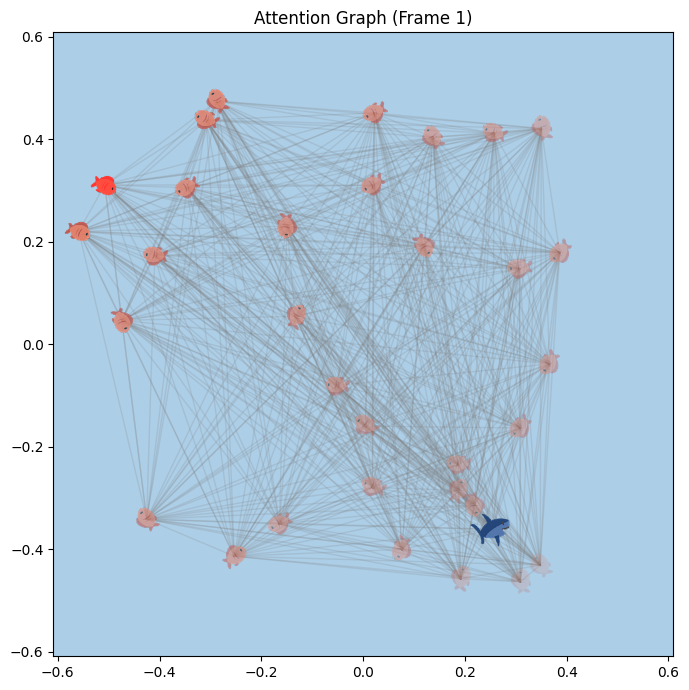

In [56]:
draw_attention_graph(gail_metrics, frame_idx=1, pred_img_path=pred_img_path, prey_img_path=prey_img_path)

In [53]:
def draw_predator_attention_graph(metrics_weights, frame_idx=1, pred_img_path=None, prey_img_path=None):
    
    metrics_list, weights_list = metrics_weights
    
    metrics = metrics_list[frame_idx]
    weights = weights_list[frame_idx]    

    xs = np.array(metrics["xs"])
    ys = np.array(metrics["ys"])
    directions = np.array(metrics["theta"])

    # center the graph
    x_center = xs.mean()
    y_center = ys.mean()
    xs_centered = xs - x_center
    ys_centered = ys - y_center

    max_range = max(max(xs_centered), max(ys_centered), abs(min(xs_centered)), abs(min(ys_centered))) + 0.05 # automated scaling + margin

    n_agents = len(xs_centered)

    fig, ax = plt.subplots(figsize=(7, 7))

    # Draw edges
    for i in range(1): # only predator's edges
        for j in range(i+1, n_agents):
            ax.plot([xs_centered[i], xs_centered[j]],
                    [ys_centered[i], ys_centered[j]],
                    color="gray", linewidth=1, alpha=0.2)

    # Nodes as Images
    pred_image = Image.open(pred_img_path).convert("RGBA")
    prey_image = Image.open(prey_img_path).convert("RGBA")

    pred_weights = weights["weights"][0]
    pred_weights = pred_weights[0, :, 0]

    weight_min = pred_weights.min()
    weight_max = pred_weights.max()
    weights_arr = 0.2 + (pred_weights - weight_min) / (weight_max - weight_min) * (1.0 - 0.2) # Scale to alpha range for transparency

    for i in range(n_agents):
        angle_deg = np.degrees(directions[i])

        base_img = pred_image if i == 0 else prey_image

        alpha = 0.999 if i == 0 else weights_arr[i-1]

        rotated_img = base_img.rotate(angle_deg+180, resample=Image.BICUBIC, expand=True)
        rotated_img = np.asarray(rotated_img).copy()

        if alpha == 1.0:
                rotated_img = rotated_img.astype(float)
                rotated_img[..., 0] *= 0.6
                rotated_img[..., 1] *= 0.6
                rotated_img[..., 2] *= 1.6
                rotated_img = np.clip(rotated_img, 0, 255).astype(np.uint8)

        rotated_img[:, :, 3] = (rotated_img[:, :, 3].astype(float) * alpha).astype(np.uint8)

        imgbox = OffsetImage(rotated_img, zoom=0.45)
        imgbox.rotation = angle_deg
        ann_box = AnnotationBbox(imgbox, (xs_centered[i], ys_centered[i]), frameon=False, xycoords='data', zorder=2)
        ax.add_artist(ann_box)

    ax.set_title(f"Predator Attention Graph (Frame {frame_idx})")
    ax.set_facecolor("#ACCEE7") # blue from marl_aquarium
    ax.set_xlim(-max_range, max_range)
    ax.set_ylim(-max_range, max_range)

    plt.tight_layout()
    plt.show()

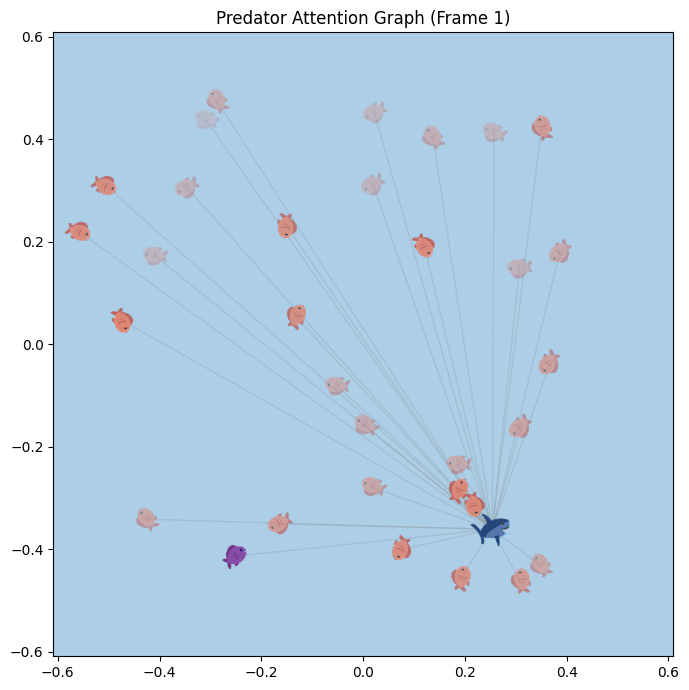

In [54]:
draw_predator_attention_graph(gail_metrics, frame_idx=1, pred_img_path=pred_img_path, prey_img_path=prey_img_path)

In [51]:
def make_video(frames_dir):
    files = sorted(os.listdir(frames_dir), reverse=True)
    first = cv2.imread(os.path.join(frames_dir, files[0]))
    height, width, _ = first.shape

    video = cv2.VideoWriter(os.path.join(frames_dir, "video.mp4"), 
                            cv2.VideoWriter_fourcc(*"mp4v"), 10, (width, height))

    for f in files:
        frame = cv2.imread(os.path.join(frames_dir, f))
        video.write(frame)

    video.release()


def record_attn_graph_video(metrics_weights, num_steps=50, pred_img_path=None, prey_img_path=None, save_dir=None):
    timestamp = datetime.datetime.now().strftime("%d.%m.%Y_%H.%M")
    folder_name = f"Experiment Garcia - {timestamp}"
    folder_path = os.path.join(save_dir, folder_name)
    os.makedirs(folder_path, exist_ok=True)

    for frame_idx in range(num_steps):

        metrics_list, weights_list = metrics_weights

        metrics = metrics_list[frame_idx]
        weights = weights_list[frame_idx]

        xs = np.array(metrics["xs"])
        ys = np.array(metrics["ys"])
        directions = np.array(metrics["theta"])  # theta in radians ([-pi, pi])

        n_agents = len(xs)

        fig, ax = plt.subplots(figsize=(7, 7))

        # Draw edges
        for i in range(n_agents):
            for j in range(i + 1, n_agents):
                ax.plot([xs[i], xs[j]],
                        [ys[i], ys[j]],
                        color="gray", linewidth=1, alpha=0.2)

        # Nodes as Images
        pred_image = Image.open(pred_img_path).convert("RGBA")
        prey_image = Image.open(prey_img_path).convert("RGBA")

        alphas = compute_incoming_weights(weights)

        for i in range(n_agents):
            angle_deg = np.degrees(directions[i])

            base_img = pred_image if i == 0 else prey_image
            alpha = alphas["predator_0"] if i == 0 else alphas[f"prey_{i}"]

            rotated_img = base_img.rotate(angle_deg+180, resample=Image.BICUBIC, expand=True)
            rotated_img = np.asarray(rotated_img).copy()

            # Mark leader prey red
            if alpha >= 0.999:
                rotated_img = rotated_img.astype(float)
                rotated_img[..., 0] *= 1.8
                rotated_img[..., 1] *= 0.6
                rotated_img[..., 2] *= 0.6
                rotated_img = np.clip(rotated_img, 0, 255).astype(np.uint8)

            rotated_img[:, :, 3] = (rotated_img[:, :, 3].astype(float) * alpha).astype(np.uint8)

            imgbox = OffsetImage(rotated_img, zoom=0.45)
            ann_box = AnnotationBbox(imgbox, (xs[i], ys[i]), frameon=False, xycoords='data', zorder=2)
            ax.add_artist(ann_box)

        ax.set_title("Attention Graph")
        ax.set_facecolor("#ACCEE7")
        ax.set_xlim(-0.1, 1.1)
        ax.set_ylim(-0.1, 1.1)
        plt.tight_layout()

        output_path = os.path.join(folder_path, f"attention_graph_{frame_idx:03d}.png")
        fig.savefig(output_path, dpi="figure")
        plt.close(fig)

        if frame_idx % 25 == 0:
            print(f"Saved frame {frame_idx}/{num_steps}")

    print("Video rendered!")
    make_video(folder_path)

In [52]:
attn_graph_dir = rf"..\results\experiment garcia\attention graph frames"
record_attn_graph_video(gail_metrics, num_steps=10, pred_img_path=pred_img_path, prey_img_path=prey_img_path, save_dir=attn_graph_dir)

C:\Users\janni\AppData\Local\Temp\ipykernel_27132\1168408029.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  incoming[tgt] += float(weights_pred[0, j])
C:\Users\janni\AppData\Local\Temp\ipykernel_27132\1168408029.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  incoming[tgt] += float(weights_prey[r, c])


Saved frame 0/10
Video rendered!
